In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("D:\HousingData.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'graphviz'

In [4]:
dataset = pandas.read_csv("D:\HousingData.csv")
dataset.sample(10)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
299   0.05561  70.0   2.24   0.0  0.400  7.041  10.0  7.8278    5  358   
70    0.08826   0.0  10.81   0.0  0.413  6.417   6.6  5.2873    4  305   
444  12.80230   0.0  18.10   0.0  0.740  5.854  96.6  1.8956   24  666   
76    0.10153   0.0  12.83   0.0  0.437  6.279  74.5  4.0522    5  398   
30    1.13081   0.0   8.14   0.0  0.538  5.713  94.1  4.2330    4  307   
90    0.04684   0.0   3.41   0.0  0.489  6.417  66.1  3.0923    2  270   
278   0.07978  40.0   6.41   0.0  0.447  6.482  32.1  4.1403    4  254   
137   0.35233   0.0  21.89   0.0  0.624  6.454  98.4  1.8498    4  437   
13    0.62976   0.0   8.14   0.0  0.538  5.949  61.8  4.7075    4  307   
95    0.12204   0.0   2.89   0.0  0.445  6.625  57.8  3.4952    2  276   

     PTRATIO       B  LSTAT  MEDV  
299     14.8  371.58   4.74  29.0  
70      19.2  383.73   6.72  24.2  
444     20.2  240.52  23.79  10.8  
76      18.7  373.66  11.97  20.0  
30      21.0  360.17  22.60  12.7  
90      17.8  392.18   8.81  22.6  
278     17.6  396.90   7.19  29.1  
137     21.2  394.08  14.59  17.1  
13      21.0  396.90   8.26  20.4  
95      18.0  357.98   6.65  28.4

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [8]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
[]


In [9]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

In [10]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

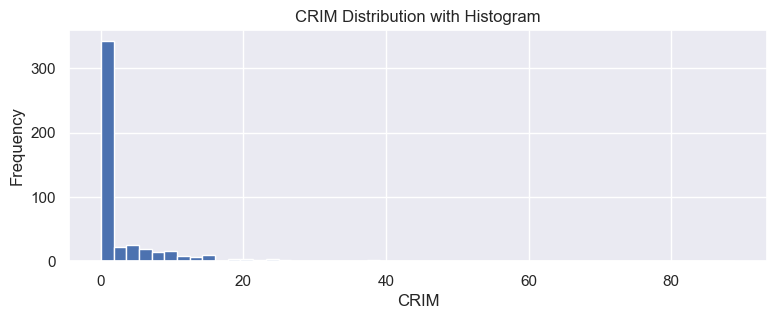

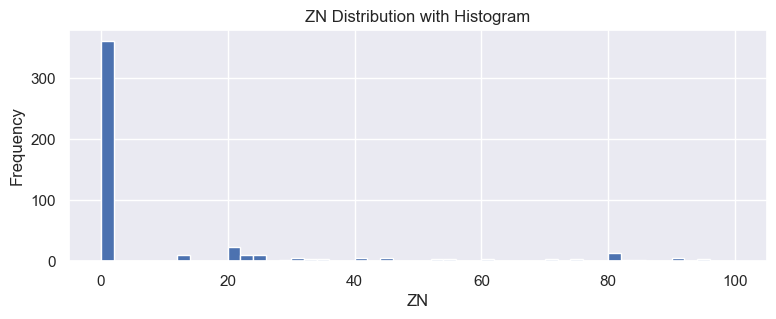

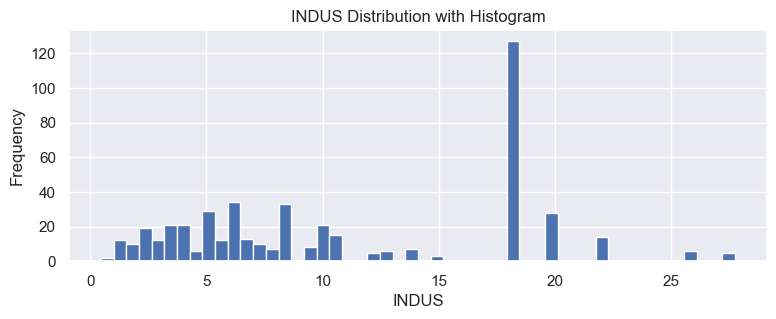

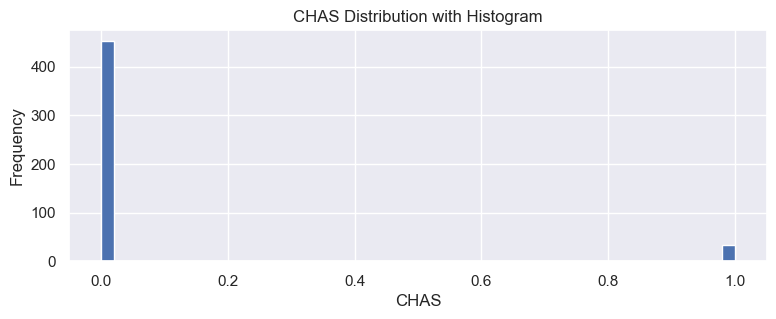

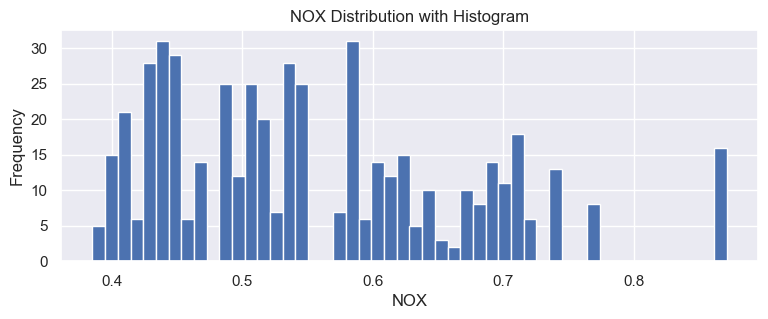

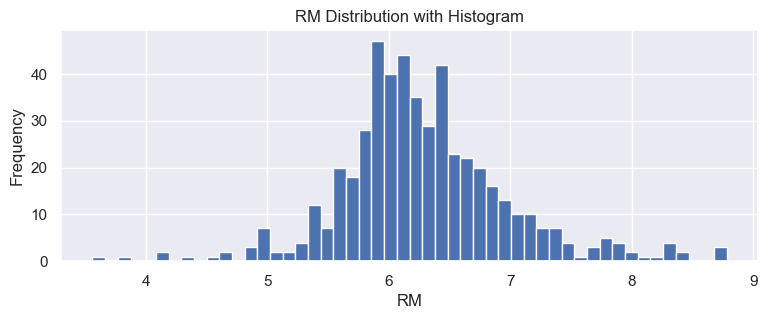

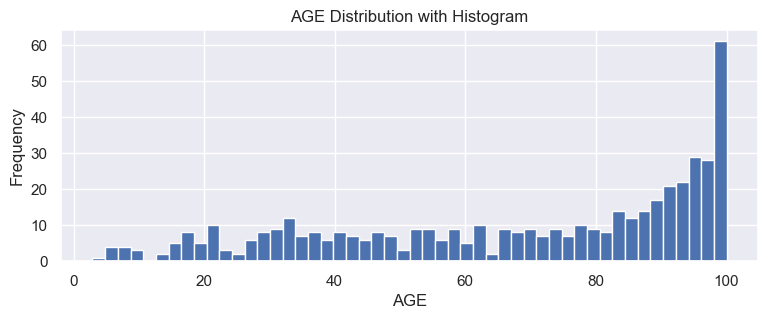

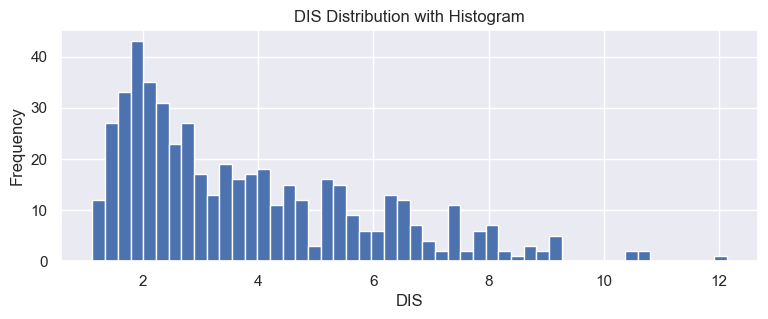

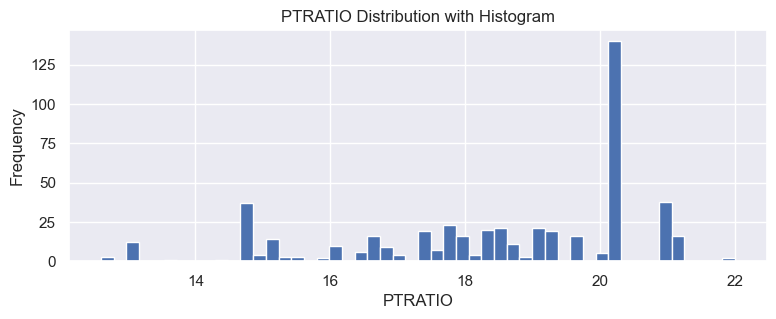

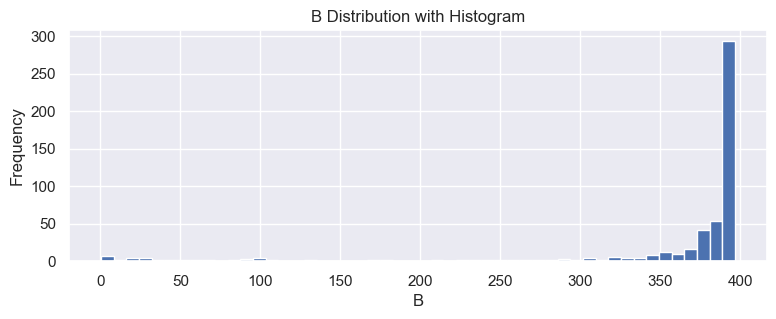

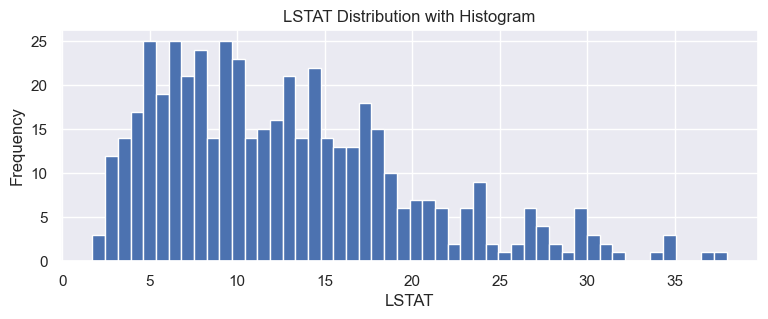

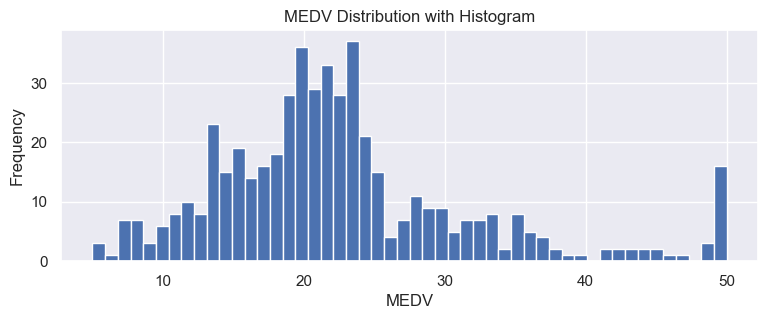

In [12]:
for n in numerical_float64_list:
    plot_hist(n)

Text(0.5, 1.0, 'RM')

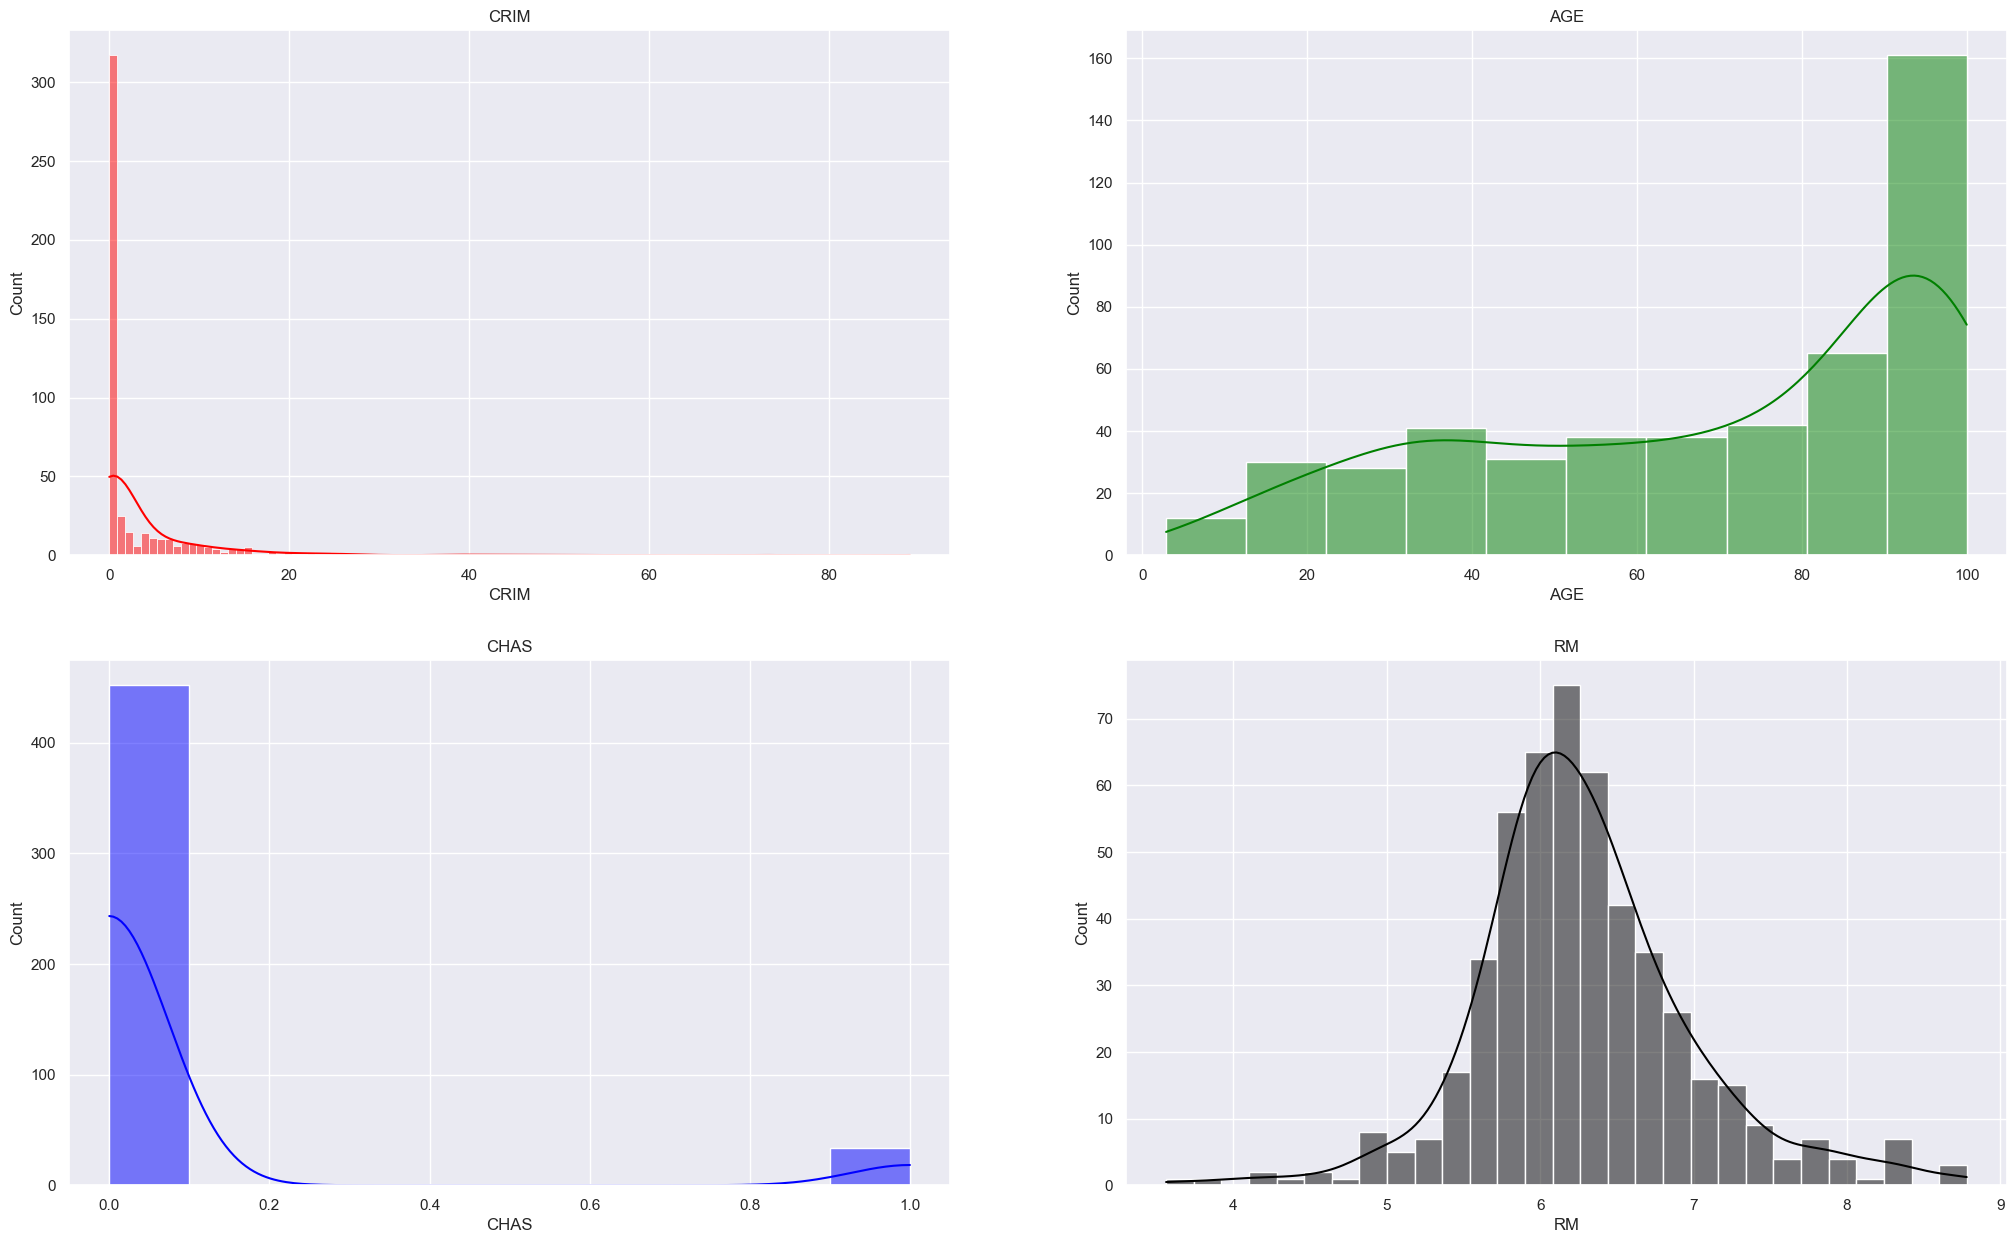

In [13]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(dataset['CRIM'], color = 'red', kde = True).set_title('CRIM')

plt.subplot(2,2,2)
sns.histplot(dataset['AGE'], color = 'green', kde = True).set_title('AGE')

plt.subplot(2,2,3)
sns.histplot(dataset['CHAS'], kde = True, color = 'blue').set_title('CHAS')

plt.subplot(2,2,4)
sns.histplot(dataset['RM'], kde = True, color = 'black').set_title('RM')

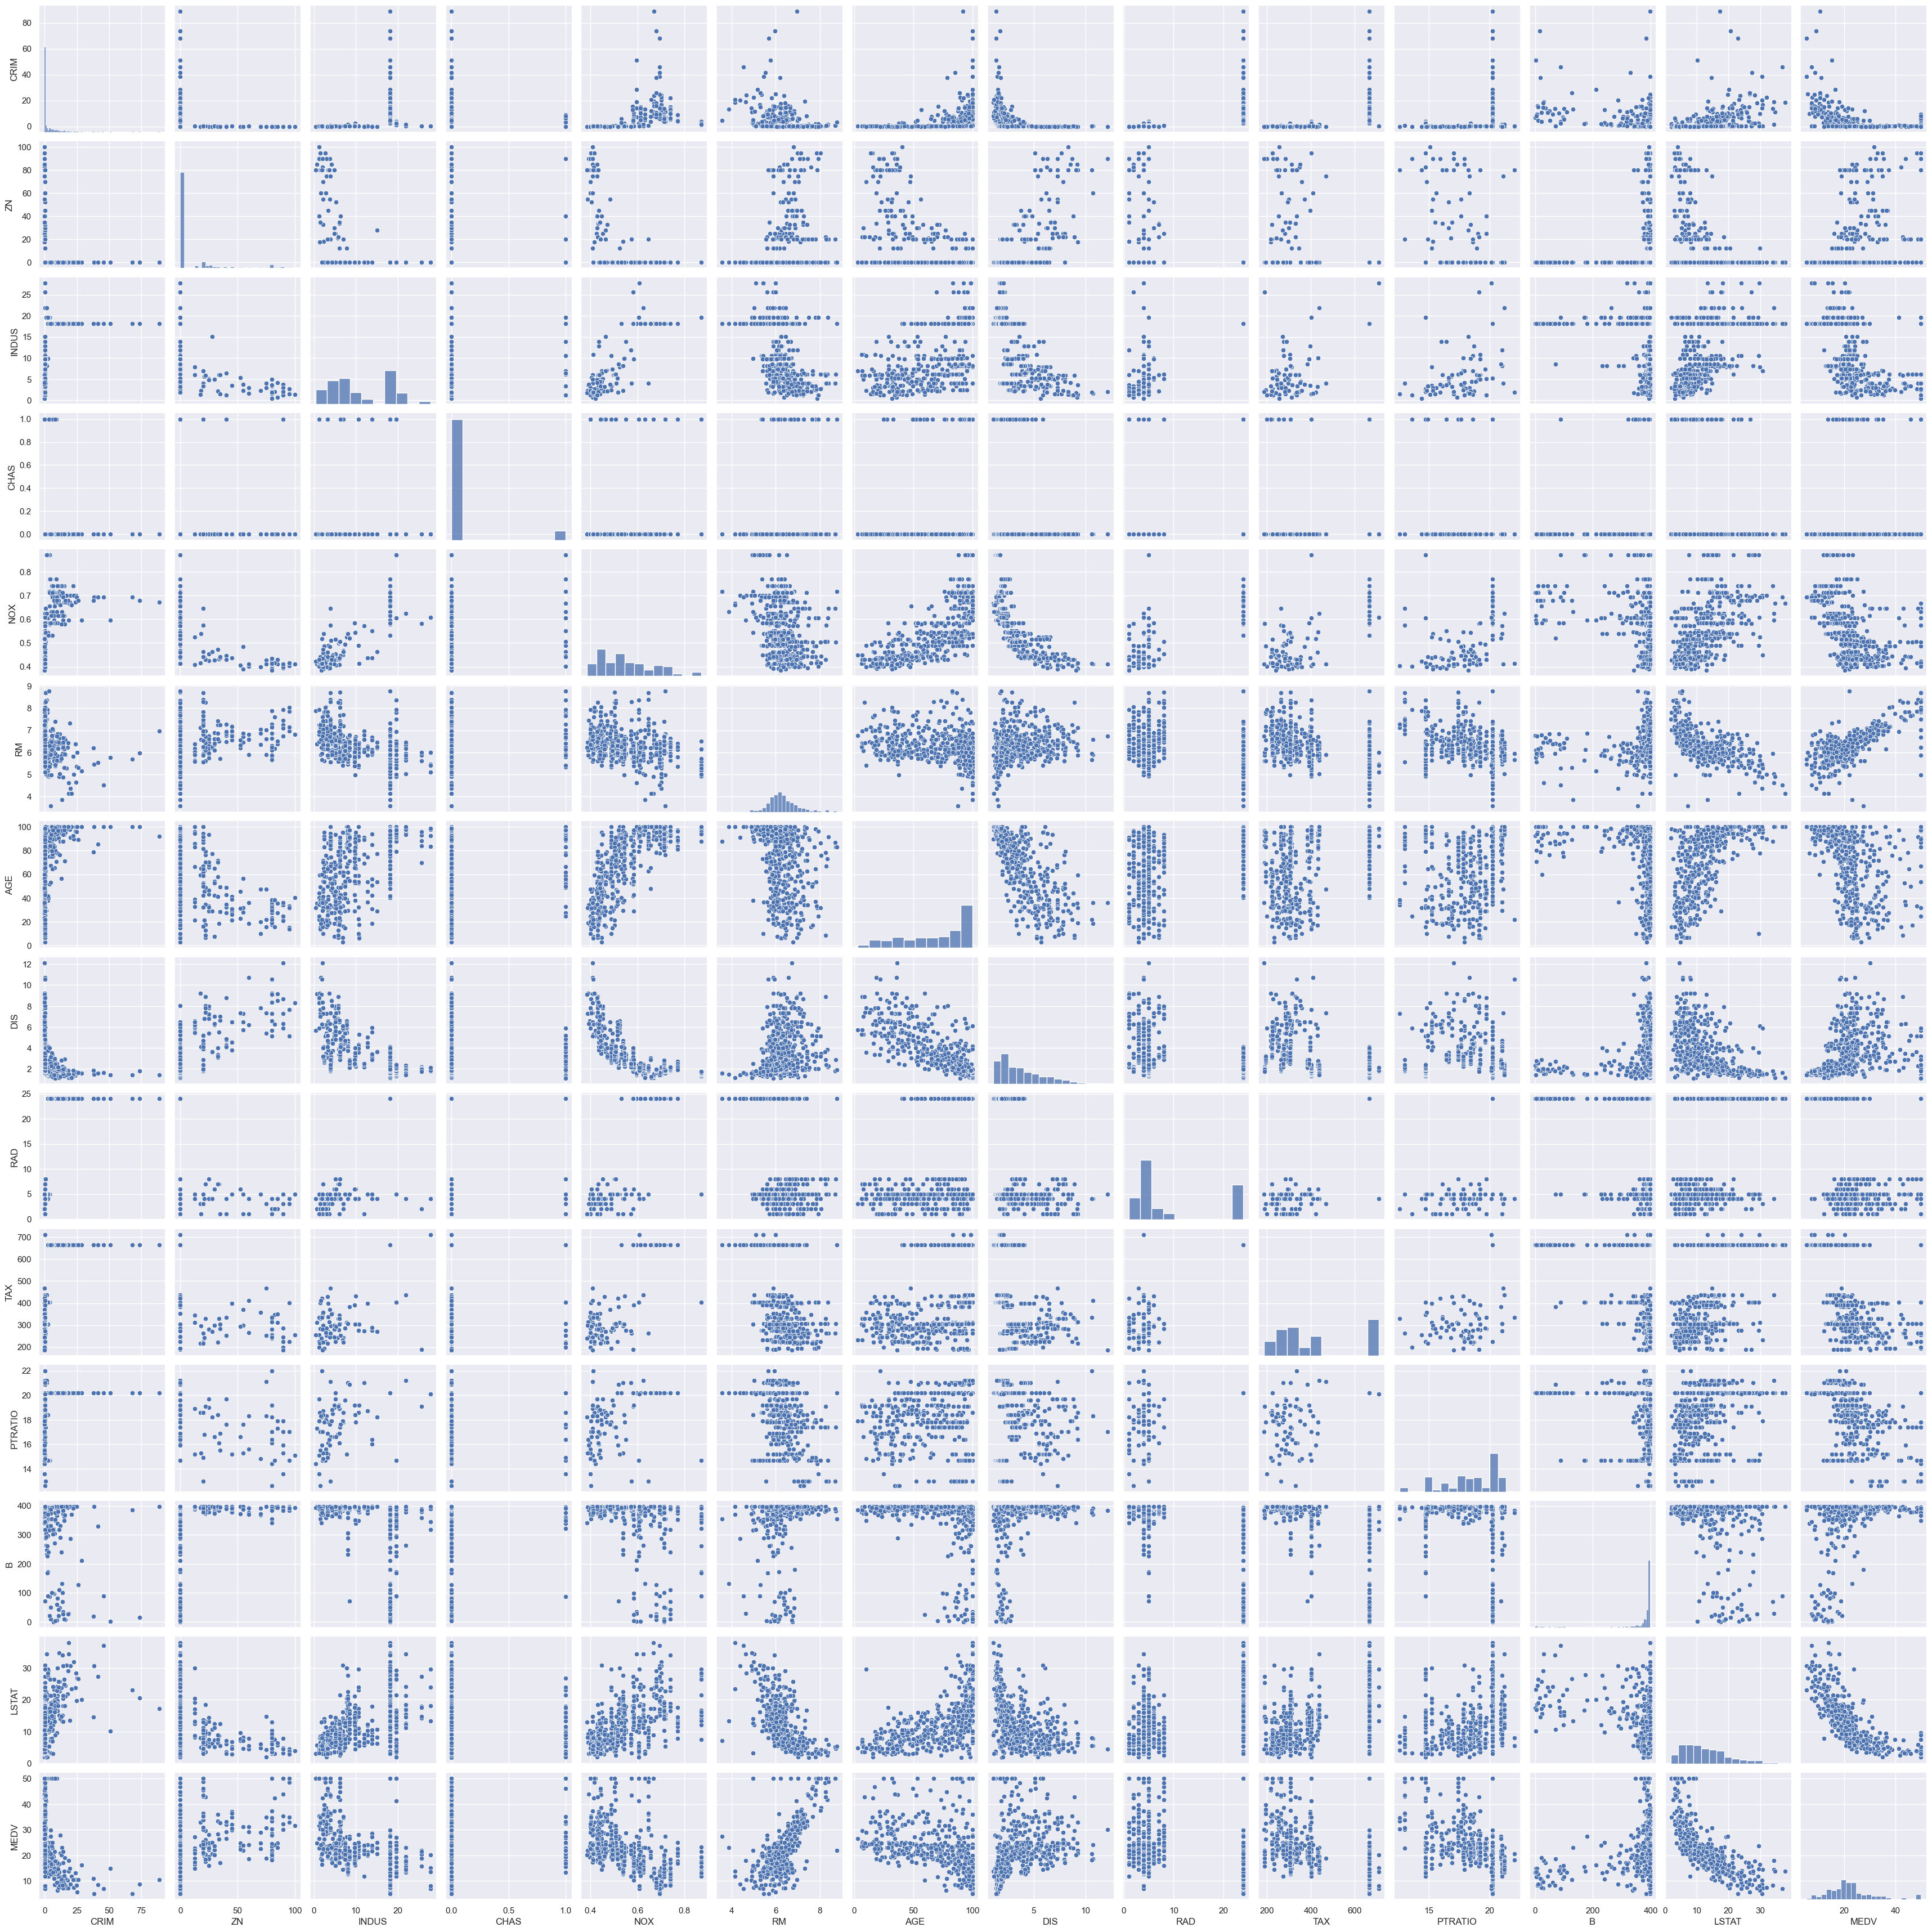

In [14]:
features = dataset.columns
sns.set_style('darkgrid')
sns.pairplot(dataset[features])

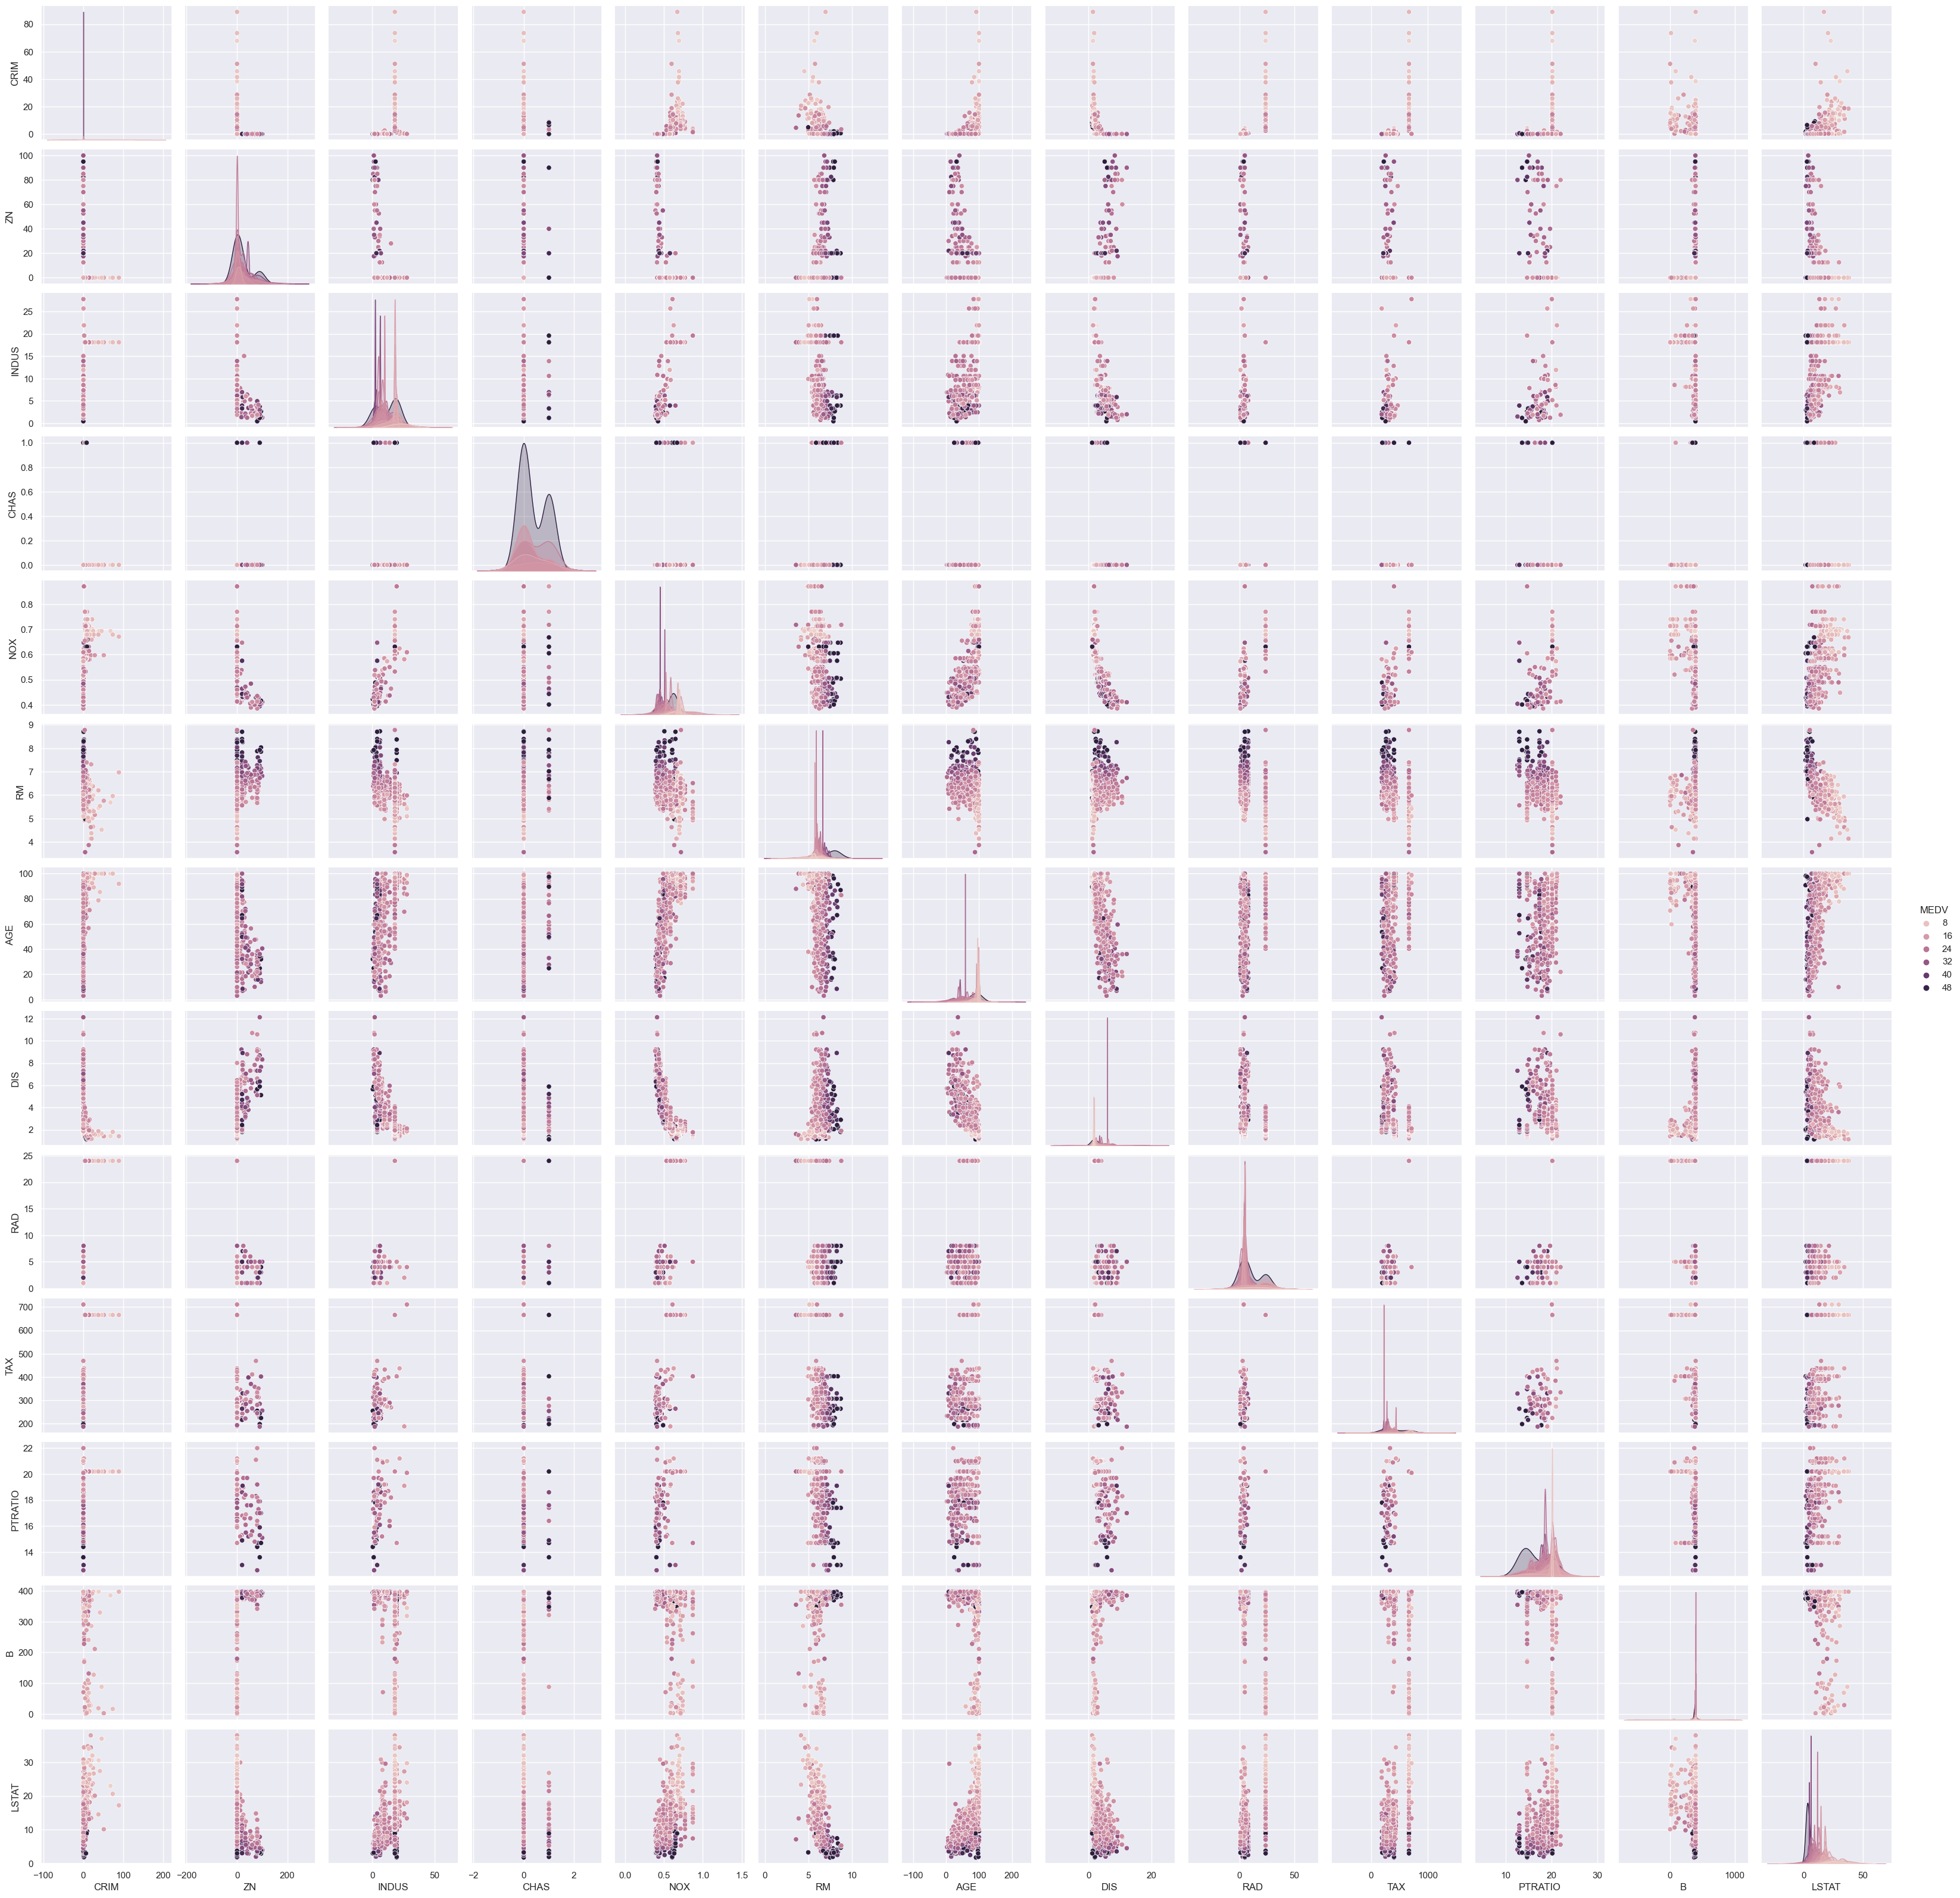

In [15]:
sns.pairplot(dataset, hue = 'MEDV')

In [16]:
dataset.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 -0.360532  0.051264 -0.380051  0.128069 -0.275303   
LSTAT    0.444943 -0.414193  0.590690 -0.047424  0.582641 -0.614339  0.602891   
MEDV    -0.391363  0.373136 -0.481772  0.181391 -0.427321  0.695360 -0.394656   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.374166  0.624765  0.580595  0.281110 -0.381411  0.444943 -0.391363  
ZN       0.656739 -0.310919 -0.312371 -0.414046  0.171303 -0.414193  0.373136  
INDUS   -0.711709  0.604533  0.731055  0.390954 -0.360532  0.590690 -0.481772  
CHAS    -0.093971  0.001468 -0.032304 -0.111304  0.051264 -0.047424  0.181391  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.582641 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.614339  0.695360  
AGE     -0.744844  0.458349  0.509114  0.269226 -0.275303  0.602891 -0.394656  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.493328  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.479541 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.536110 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.375966 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.369889  0.333461  
LSTAT   -0.493328  0.479541  0.536110  0.375966 -0.369889  1.000000 -0.735822  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.735822  1.000000

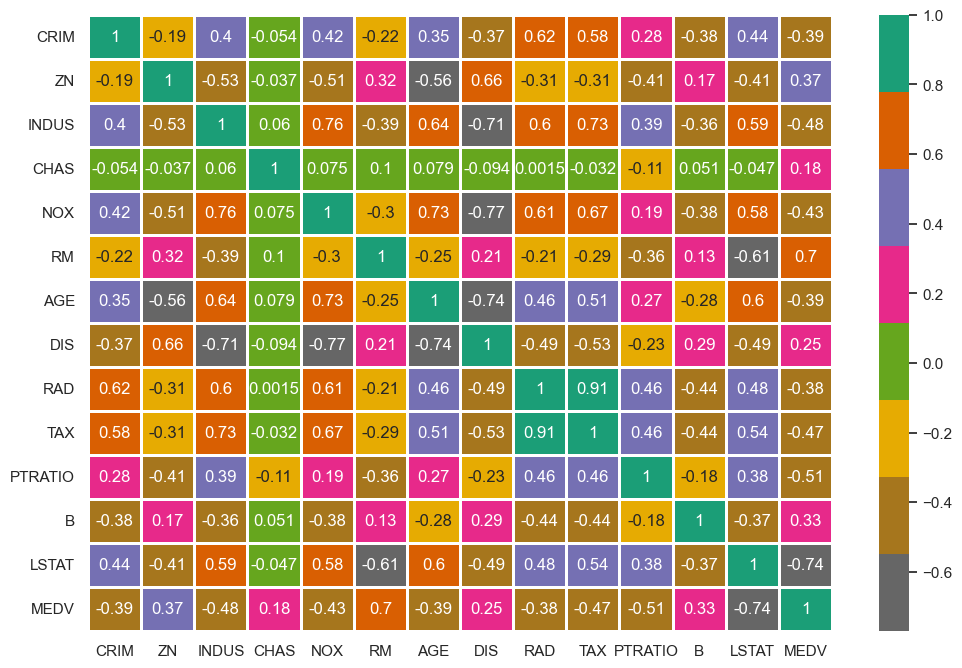

In [17]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

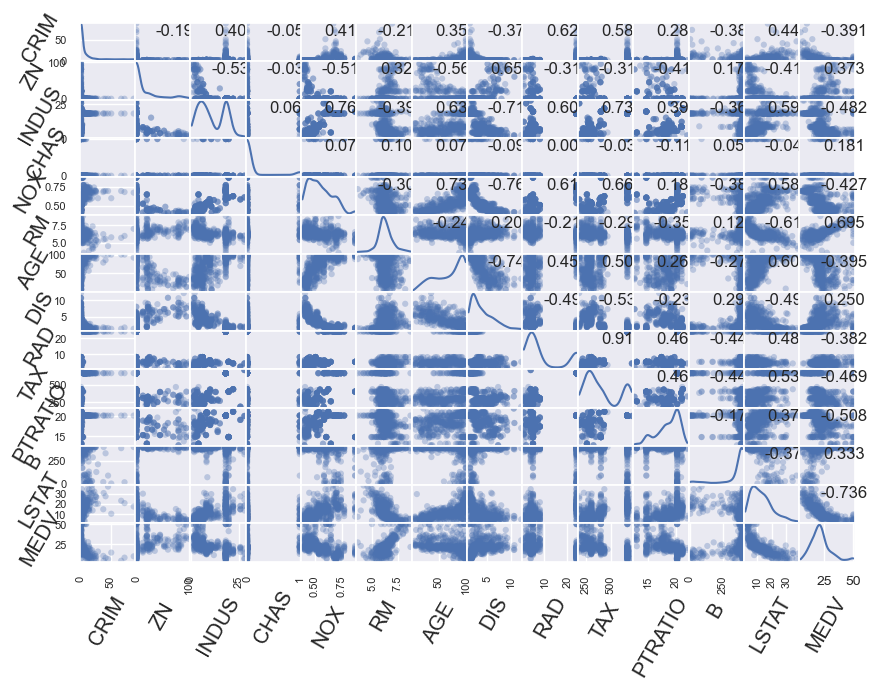

In [18]:
sns.set_style('darkgrid')
axes = pandas.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (10,7), diagonal = 'kde' ,s=80)
corr = dataset.corr().values

plt.xticks(fontsize =10,rotation =0)
plt.yticks(fontsize =10)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 15, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 15, rotation = 60)
# put the correlation between each pair of variables on each graph
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")

<AxesSubplot:xlabel='INDUS', ylabel='ZN'>

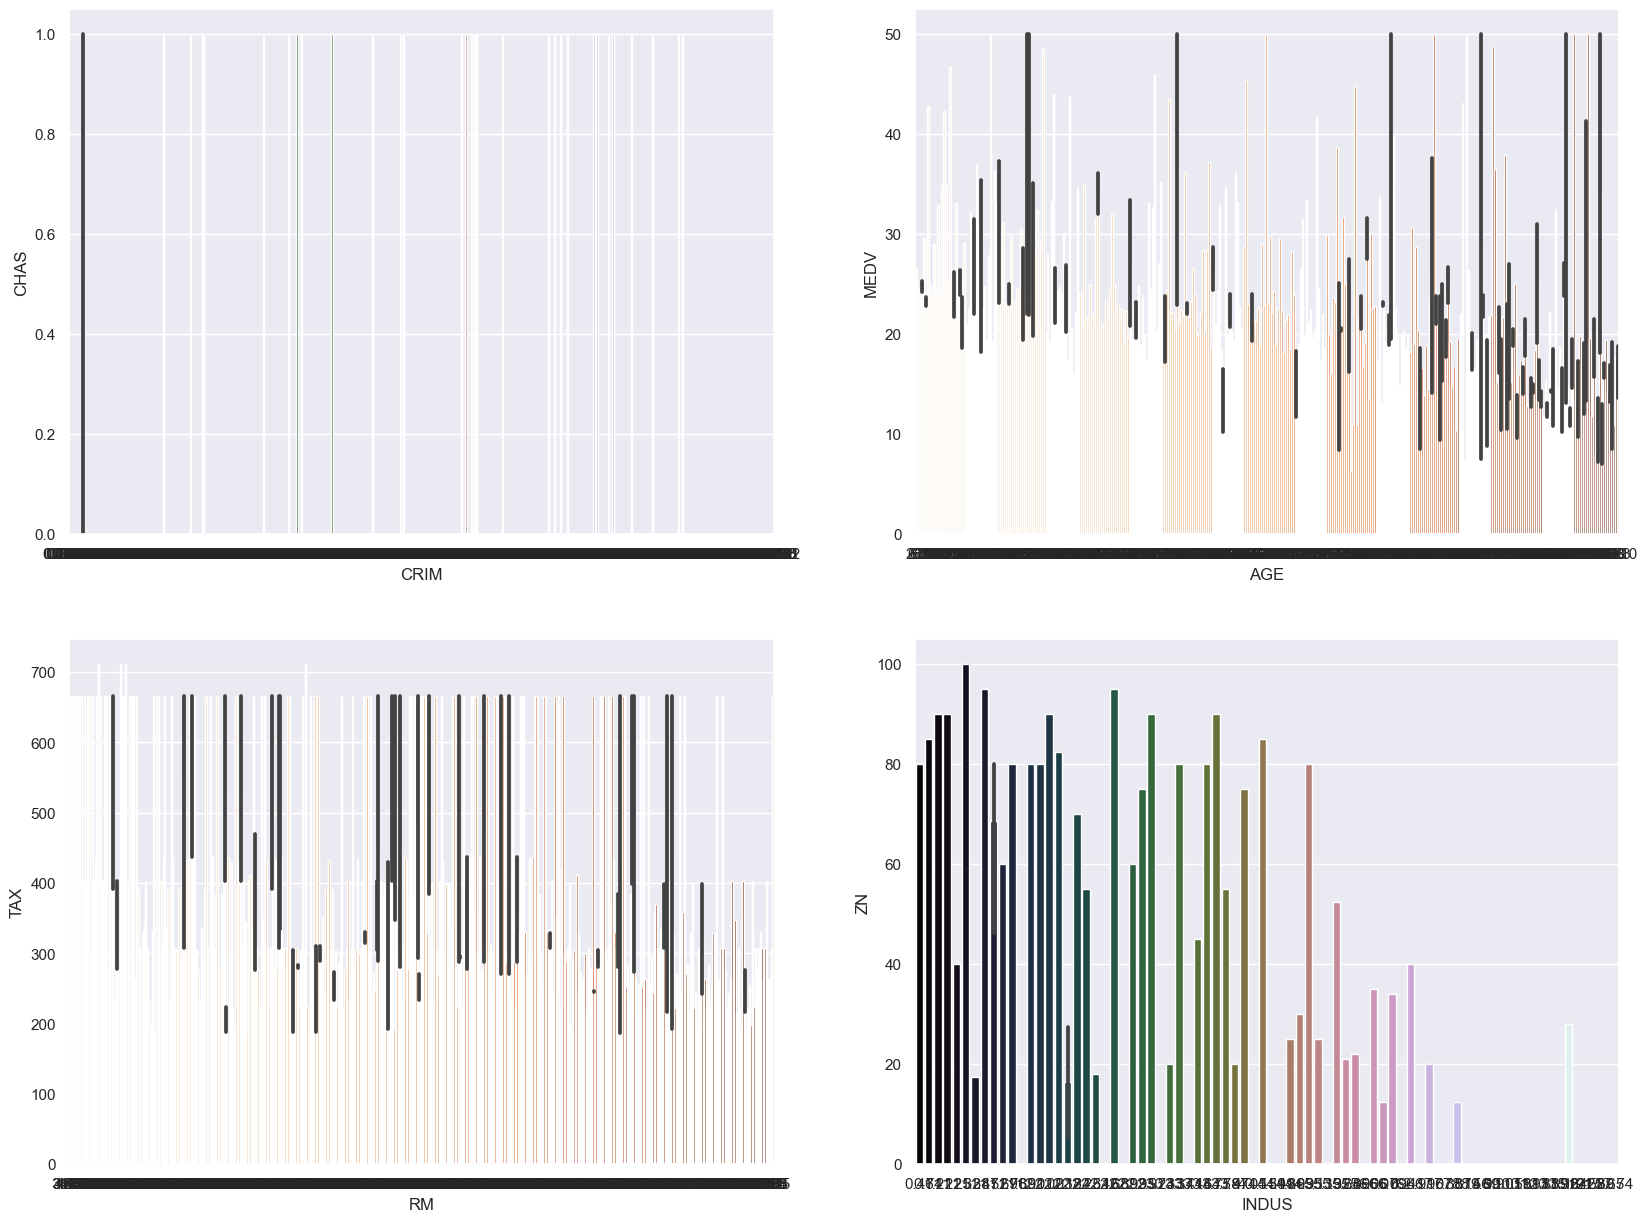

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x = 'CRIM', y = 'CHAS', data = dataset, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'AGE', y = 'MEDV', data = dataset, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(x = 'RM', y = 'TAX', data = dataset, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(x = 'INDUS', y = 'ZN', data = dataset, palette="cubehelix")